# Milestone 1 - EDA and Preprocessing data 

***Important note*** - This is merely a template. you are recommended to create your own notebook from scratch.

> Make sure to include markdown-based text commenting and explaining each step you perform.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
dataset_path = './fintech_data_29_52_1008.csv'

In [3]:
fintech_df = pd.read_csv(dataset_path)

# EDA

In [4]:
fintech_df.shape

(27030, 24)

what is does the rows look like?

In [5]:
fintech_df.head()

,Customer Id,Emp Title,Emp Length,Home Ownership,Annual Inc,Annual Inc Joint,Verification Status,Zip Code,Addr State,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Status,Loan Amount,State,Funded Amount,Term,Int Rate,Grade,Issue Date,Pymnt Plan,Type,Purpose,Description
0,YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceG...,president/owner,10+ years,MORTGAGE,80000.0,NaN,Source Verified,333xx,FL,8275.0,239986.0,39474,Current,6000.0,FL,6000.0,36 months,0.0649,4,14 August 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation
1,Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceD...,PETTY OFFICER FIRST CLASS,10+ years,MORTGAGE,75384.0,NaN,Source Verified,237xx,VA,25385.0,279232.0,158200,Current,15000.0,VA,15000.0,60 months,0.1806,20,17 July 2017,False,Individual,debt_consolidation,Debt consolidation
2,YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT...,nyco,4 years,OWN,33800.0,NaN,Verified,111xx,NY,282.0,1691.0,113752,Fully Paid,11500.0,NY,11500.0,36 months,0.1114,7,12 December 2012,False,INDIVIDUAL,other,Family Help
3,YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZT...,Nippon Express USA Inc.,10+ years,OWN,50000.0,NaN,Verified,070xx,NJ,14458.0,130124.0,181412,Fully Paid,18000.0,NJ,18000.0,60 months,0.2149,23,12 November 2012,False,INDIVIDUAL,credit_card,Credit Card Payoff
4,YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YW...,Operations Manager,2 years,MORTGAGE,75000.0,160000.0,Not Verified,750xx,TX,27703.0,443252.0,227090,Current,25000.0,TX,25000.0,60 months,0.1171,10,19 September 2019,False,Joint App,home_improvement,Home improvement


info regarding the dataset

In [6]:
fintech_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27030 entries, 0 to 27029
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Id          27030 non-null  object 
 1   Emp Title            24702 non-null  object 
 2   Emp Length           25198 non-null  object 
 3   Home Ownership       27030 non-null  object 
 4   Annual Inc           27030 non-null  float64
 5   Annual Inc Joint     1860 non-null   float64
 6   Verification Status  27030 non-null  object 
 7   Zip Code             27030 non-null  object 
 8   Addr State           27030 non-null  object 
 9   Avg Cur Bal          27030 non-null  float64
 10  Tot Cur Bal          27030 non-null  float64
 11  Loan Id              27030 non-null  int64  
 12  Loan Status          27030 non-null  object 
 13  Loan Amount          27030 non-null  float64
 14  State                27030 non-null  object 
 15  Funded Amount        27030 non-null 

how many columns have missing values and by how many?

In [7]:
fintech_df.isnull().mean().sort_values(ascending=False)*100

Annual Inc Joint       93.118757
Emp Title               8.612653
Emp Length              6.777654
Int Rate                4.384018
Description             0.813910
State                   0.000000
Purpose                 0.000000
Type                    0.000000
Pymnt Plan              0.000000
Issue Date              0.000000
Grade                   0.000000
Term                    0.000000
Funded Amount           0.000000
Customer Id             0.000000
Loan Amount             0.000000
Loan Id                 0.000000
Tot Cur Bal             0.000000
Avg Cur Bal             0.000000
Addr State              0.000000
Zip Code                0.000000
Verification Status     0.000000
Annual Inc              0.000000
Home Ownership          0.000000
Loan Status             0.000000
dtype: float64

In [8]:
fintech_df.isnull().sum().sort_values(ascending=False)*100

Annual Inc Joint       2517000
Emp Title               232800
Emp Length              183200
Int Rate                118500
Description              22000
State                        0
Purpose                      0
Type                         0
Pymnt Plan                   0
Issue Date                   0
Grade                        0
Term                         0
Funded Amount                0
Customer Id                  0
Loan Amount                  0
Loan Id                      0
Tot Cur Bal                  0
Avg Cur Bal                  0
Addr State                   0
Zip Code                     0
Verification Status          0
Annual Inc                   0
Home Ownership               0
Loan Status                  0
dtype: int64

As you can see 5 columns have missing values which are: Emp Title, Emp Length, Annual Inc Joint, Int Rate, Description

In [9]:
fintech_df.describe()

,Annual Inc,Annual Inc Joint,Avg Cur Bal,Tot Cur Bal,Loan Id,Loan Amount,Funded Amount,Int Rate,Grade
count,2.703000e+04,1860.000000,27030.000000,2.703000e+04,27030.000000,27030.000000,27030.000000,25845.000000,27030.000000
mean,7.925754e+04,129055.124782,13746.438846,1.445167e+05,135571.697188,15442.939327,15442.939327,0.130702,10.904698
std,7.909597e+04,65960.411187,16785.513307,1.582944e+05,77822.021405,9424.206653,9424.206653,0.048983,6.344409
min,2.230000e+02,22020.000000,0.000000,1.000000e+00,1.000000,1000.000000,1000.000000,0.053100,1.000000
25%,4.800000e+04,86000.000000,3128.000000,2.954725e+04,68354.000000,8000.000000,8000.000000,0.091700,6.000000
50%,6.700000e+04,115000.000000,7455.500000,8.160850e+04,136046.000000,13500.000000,13500.000000,0.126100,10.000000
75%,9.500000e+04,154550.000000,19056.750000,2.168390e+05,202992.500000,20400.000000,20400.000000,0.159900,15.000000
max,9.550000e+06,686000.000000,337533.000000,2.752103e+06,270283.000000,40000.000000,40000.000000,0.309900,35.000000


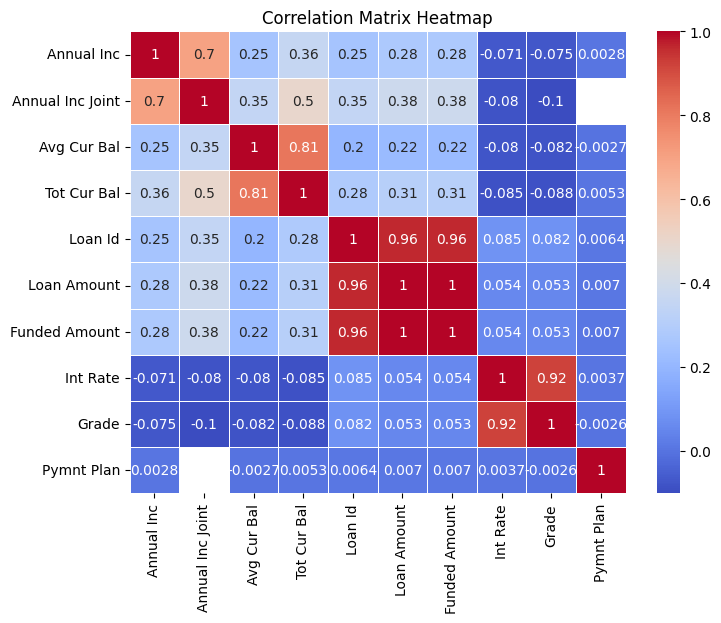

In [10]:
corr_matrix = fintech_df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Some Insights:
 1. there are no 2 variables negatively correlated
 2. There are some strong positive correlations between 2 variables exceeding 0.9 like (Funded Amount, Loan Id, 0.96) , (Funded Amount, Loan Amount, 1), (Loan Amount, Loan Id, 0.96), (Grade, Int Rate, 0.92)
 3. Some weaker positive correlations that should be mentioned are (Total Cur Bal, Avg Cur Bal, 0.81), (Annual Inc, Annual Inc Joint, 0.7)

### Tidy up column names

In [11]:
fintech_df.columns

Index(['Customer Id', 'Emp Title', 'Emp Length', 'Home Ownership',
       'Annual Inc', 'Annual Inc Joint', 'Verification Status', 'Zip Code',
       'Addr State', 'Avg Cur Bal', 'Tot Cur Bal', 'Loan Id', 'Loan Status',
       'Loan Amount', 'State', 'Funded Amount', 'Term', 'Int Rate', 'Grade',
       'Issue Date', 'Pymnt Plan', 'Type', 'Purpose', 'Description'],
      dtype='object')

In [12]:
fintech_df_2 = fintech_df.copy()

In [13]:
def tidy_up_columns(df: pd.DataFrame):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [14]:
fintech_df_2 = tidy_up_columns(fintech_df_2)

In [15]:
fintech_df_2.columns

Index(['customer_id', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'annual_inc_joint', 'verification_status', 'zip_code',
       'addr_state', 'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status',
       'loan_amount', 'state', 'funded_amount', 'term', 'int_rate', 'grade',
       'issue_date', 'pymnt_plan', 'type', 'purpose', 'description'],
      dtype='object')

### Choose Suitable Index

In [16]:
fintech_df_2['customer_id'].nunique() == fintech_df_2.shape[0] 

True

In [17]:
fintech_df_2['customer_id']

0        YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceG...
1        Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceD...
2        YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT...
3        YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZT...
4        YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YW...
                               ...                        
27025    YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YT...
27026    YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XH...
27027    Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceD...
27028    YidsXHgxOVx4OTAjXHhjM0pceGNkKlx4ZDJceDlkXHhlZF...
27029    YickXHgxMVx4MDVceGM3JVx4ZjZGXHhhNllmXHhmNDRceG...
Name: customer_id, Length: 27030, dtype: object

In [18]:
def set_index(col_name: str, df: pd.DataFrame):
    df = df.set_index(col_name)
    return df

In [19]:
fintech_df_2 = set_index('customer_id', fintech_df_2)

In [20]:
fintech_df_2.head()

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
customer_id,,,,,,,,,,,,,,,,,,,,,,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,president/owner,10+ years,MORTGAGE,80000.0,NaN,Source Verified,333xx,FL,8275.0,239986.0,39474,Current,6000.0,FL,6000.0,36 months,0.0649,4,14 August 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,PETTY OFFICER FIRST CLASS,10+ years,MORTGAGE,75384.0,NaN,Source Verified,237xx,VA,25385.0,279232.0,158200,Current,15000.0,VA,15000.0,60 months,0.1806,20,17 July 2017,False,Individual,debt_consolidation,Debt consolidation
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,nyco,4 years,OWN,33800.0,NaN,Verified,111xx,NY,282.0,1691.0,113752,Fully Paid,11500.0,NY,11500.0,36 months,0.1114,7,12 December 2012,False,INDIVIDUAL,other,Family Help
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,Nippon Express USA Inc.,10+ years,OWN,50000.0,NaN,Verified,070xx,NJ,14458.0,130124.0,181412,Fully Paid,18000.0,NJ,18000.0,60 months,0.2149,23,12 November 2012,False,INDIVIDUAL,credit_card,Credit Card Payoff
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,Operations Manager,2 years,MORTGAGE,75000.0,160000.0,Not Verified,750xx,TX,27703.0,443252.0,227090,Current,25000.0,TX,25000.0,60 months,0.1171,10,19 September 2019,False,Joint App,home_improvement,Home improvement


### What is the distribution of loan amounts across different loan statuses?

In [21]:
def draw_boxplot_for_two_columns(col_name_1: str, col_name_2: str, df: pd.DataFrame):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col_name_1, y=col_name_2, data=df)
    plt.title(f'{col_name_1} vs {col_name_2}')
    plt.xlabel(col_name_1, fontsize=12)
    plt.ylabel(col_name_2, fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

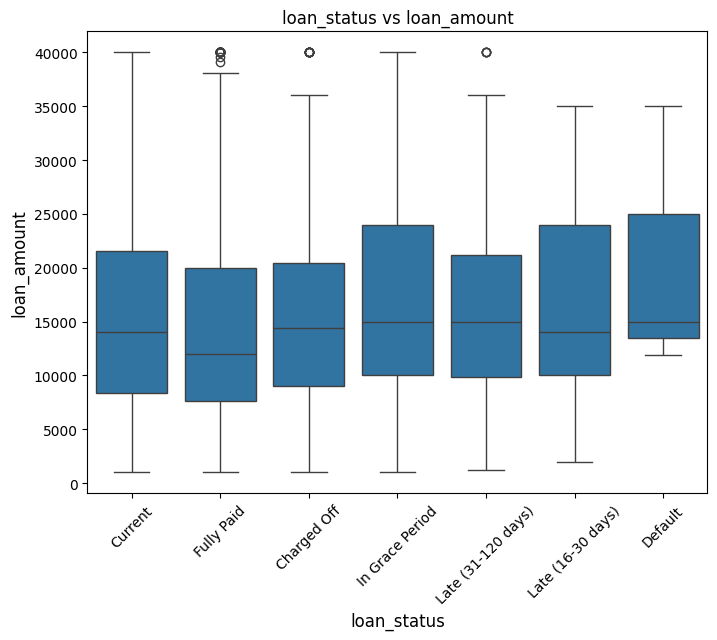

In [22]:
draw_boxplot_for_two_columns('loan_status', 'loan_amount', fintech_df_2)

In [23]:
def get_loan_amount_for_each_status(df: pd.DataFrame):
    loan_amount = df.groupby('loan_status')['loan_amount'].sum().sort_values(ascending=False)
    return loan_amount

In [24]:
get_loan_amount_for_each_status(fintech_df_2)

loan_status
Current               272381825.0
Fully Paid            107814475.0
Charged Off            27742925.0
Late (31-120 days)      5053900.0
In Grace Period         2863825.0
Late (16-30 days)       1503800.0
Default                   61900.0
Name: loan_amount, dtype: float64

#### Insights from Loan Amount Distribution by Loan Status

- **Current loans** have the highest total loan amount, summing to approximately \$272.4 million. This indicates that the majority of loans are still in progress and have not yet reached a conclusion, whether paid off, late, or defaulted.
- **Fully Paid loans** make up the second-largest share, with \$107.8 million in total. This is a positive sign of a significant portion of loans being repaid successfully.
- **Charged Off loans** represent \$27.7 million in total, indicating a notable amount of loans that have been written off due to the borrower's inability to repay.
- **Late loans** (31-120 days late) account for \$5.05 million, while **Late loans** (16-30 days late) total only \$1.5 million. This suggests that most late loans are significantly overdue.
- **In Grace Period loans** make up \$2.86 million. This represents loans that are temporarily delinquent but have a grace period for repayment.
- **Defaulted loans** are the smallest category, totaling just \$61,900. This is a good indication that defaults are rare, but these loans are likely beyond recovery.
  
#### Observations from the Boxplot:
- **Fully Paid loans** have a slightly lower median loan amount than other statuses, indicating that borrowers with smaller loans may be more likely to repay fully.
- There are outliers in categories like **Fully Paid** and **Charged Off**, representing significantly larger loans compared to the majority.


In [25]:
fintech_df_2['grade'].unique()

array([ 4, 20,  7, 23, 10, 19,  8, 14,  5, 11, 18,  6,  1, 12, 15, 25, 13,
        2,  9,  3, 28, 17, 27, 24, 30, 16, 26, 21, 29, 35, 22, 33, 34, 31,
       32], dtype=int64)

### Cleaning the columns

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplot(df: pd.DataFrame, column: str):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

def calculate_whiskers(df: pd.DataFrame, column: str):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    iqr_outliers_mask = (df[column] < lower_whisker) | (df[column] > upper_whisker)
    return iqr_outliers_mask, lower_whisker, upper_whisker

def remove_outliers_using_boxplot(df: pd.DataFrame, column: str) -> pd.DataFrame:
    plot_boxplot(df, column)
    iqr_outliers_mask, _, _ = calculate_whiskers(df, column)
    df = df[~iqr_outliers_mask]
    return df

In [27]:
def plot_hist(df: pd.DataFrame, column: str):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [28]:
def plot_kde(df: pd.DataFrame, column: str):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()


In [52]:
def convert_to_z_score(df: pd.DataFrame, column: str):
    df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

In [73]:
def plot_z_score(df: pd.DataFrame, column: str) -> pd.Series:
    z_score = (df[column] - df[column].mean()) / df[column].std()
    plt.figure(figsize=(8, 6))
    sns.kdeplot(z_score, shade=True)
    plt.title(f'KDE Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()
    return z_score

def remove_outliers_using_z_score(df: pd.DataFrame, column: str, threshold: float=3) -> pd.DataFrame:
    z_score = (df[column] - df[column].mean()) / df[column].std()
    outliers_mask = z_score.abs() > threshold
    df = df[~outliers_mask]
    return df

#### Lets make an encoding function in case we need it 

In [29]:
global_lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])

def encode_col(df: pd.DataFrame, type_of_encoding: str, col_name: str) -> pd.DataFrame:
    assert type_of_encoding in ['label', 'onehot'], 'Invalid type of encoding. Please choose either "label" or "onehot"'

    global global_lookup_table
    lookup_table = pd.DataFrame()
    if type_of_encoding == 'label':
        lookup_table['Original'] = df[col_name].astype('category').cat.categories
        lookup_table['Encoded'] = range(len(lookup_table))
        df[col_name] = df[col_name].astype('category').cat.codes
        
    elif type_of_encoding == 'onehot':
        unique_values = df[col_name].unique()
        lookup_table['Original'] = unique_values
        lookup_table['Encoded'] = [f'{col_name}_{val}' for val in unique_values]
        one_hot_df = pd.get_dummies(df[col_name], prefix=col_name, dtype=int)
        df = pd.concat([df.drop(columns=[col_name]), one_hot_df], axis=1)

    lookup_table['Column'] = col_name
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)
    
    return df


#### Drop Duplicates

no duplicates so no need to drop anything

In [30]:
fintech_df_2[fintech_df_2.duplicated()]

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
customer_id,,,,,,,,,,,,,,,,,,,,,,,


### emp_title

In [31]:
fintech_df_2['emp_title'].value_counts()

emp_title
Teacher                            468
Manager                            402
Owner                              229
Driver                             212
Registered Nurse                   188
                                  ... 
Quality Management Specialist        1
VP-Information Security Officer      1
elevator constructor                 1
Registered Nurse Mgr                 1
Medical Esthetician                  1
Name: count, Length: 13165, dtype: int64

In [32]:
fintech_df_2['emp_title'].nunique()

13165

In [33]:
fintech_df_2['emp_title'].unique()

array(['president/owner', 'PETTY OFFICER FIRST CLASS', 'nyco ', ...,
       'Scm', 'Sr. Marketing Administrator', 'Medical Esthetician'],
      dtype=object)

In [34]:
def clean_str_in_col(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[col_name] = df[col_name].str.lower().str.strip()
    return df

In [35]:
fintech_df_2 = clean_str_in_col(fintech_df_2, 'emp_title')

In [36]:
fintech_df_2['emp_title'].nunique()

10977

impute

In [37]:
fintech_df_2['emp_title'].isna().sum()

2328

In [38]:
def impute_emp_title(df: pd.DataFrame) -> pd.DataFrame:
    df['emp_title'] = df['emp_title'].fillna('unknown')
    # add to global lookup what value we used for imputation
    global global_lookup_table
    lookup_table = pd.DataFrame(columns=['Column', 'Original', 'Encoded'])
    lookup_table['Column'] = ['emp_title']
    lookup_table['Original'] = [np.nan]
    lookup_table['Encoded'] = ['unknown']
    global_lookup_table = pd.concat([global_lookup_table, lookup_table], ignore_index=True)
    return df

In [39]:
fintech_df_2 = impute_emp_title(fintech_df_2)

In [40]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown


In [41]:
fintech_df_2['emp_title'].isna().sum()

0

### emp_length

In [44]:
fintech_df_2['emp_length'].unique()

array(['10+ years', '4 years', '2 years', '6 years', '1 year', '5 years',
       '7 years', nan, '< 1 year', '9 years', '3 years', '8 years'],
      dtype=object)

In [45]:
def clean_emp_length(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[col_name] = df[col_name].str.replace('years', '').str.replace('year', '').str.replace('< 1', '0').str.replace('10+', '11').str.strip()
    df[col_name] = df[col_name].astype(float)
    return df

In [46]:
fintech_df_2 = clean_emp_length(fintech_df_2, 'emp_length')

In [47]:
fintech_df_2['emp_length'].unique()

array([11.,  4.,  2.,  6.,  1.,  5.,  7., nan,  0.,  9.,  3.,  8.])

#### Outliers

##### Z_score

C:\Users\001\AppData\Local\Temp\ipykernel_41728\1828278008.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(z_score, shade=True)


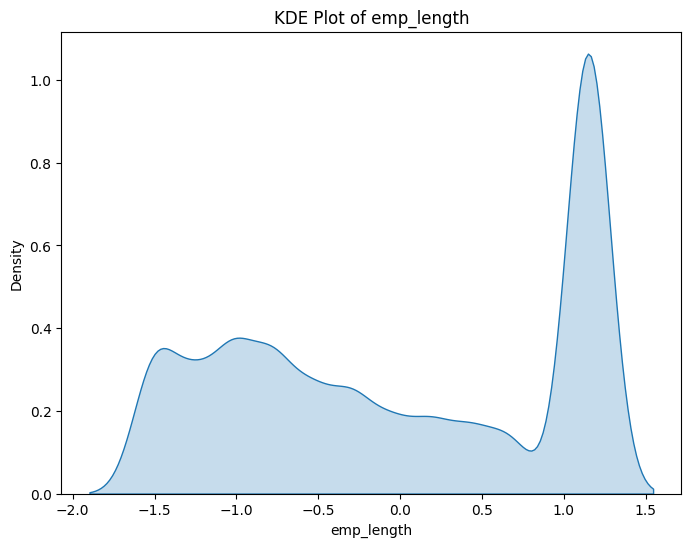

In [56]:
emp_length_z_score = plot_z_score(fintech_df_2, 'emp_length')

In [57]:
emp_length_z_score[emp_length_z_score.abs()>3]

Series([], Name: emp_length, dtype: float64)

##### Boxplot

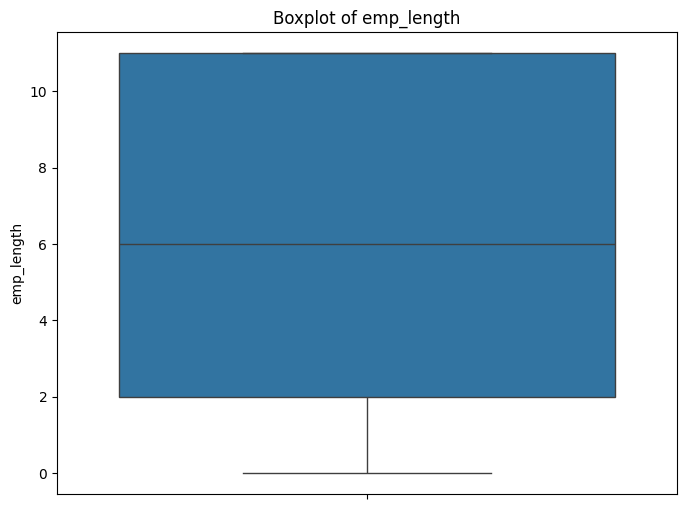

In [50]:
plot_boxplot(fintech_df_2, 'emp_length')

As shown no outliers are detected in both methods

#### Impute

In [48]:
fintech_df_2['emp_length'].isna().sum()

1832

In [49]:
fintech_df_2[fintech_df_2['emp_length'].isna()]

,emp_title,emp_length,home_ownership,annual_inc,annual_inc_joint,verification_status,zip_code,addr_state,avg_cur_bal,tot_cur_bal,loan_id,loan_status,loan_amount,state,funded_amount,term,int_rate,grade,issue_date,pymnt_plan,type,purpose,description
customer_id,,,,,,,,,,,,,,,,,,,,,,,
YidcXFx4MTlceGQ4XHhkNlx4YWMqXHhkMH5GU1x4ODlceGMyXHhjMFx4ZDJceDBiXHgxYlx4MGZceDlkXHhmMFx4ZDdOXHg5ZVx4YzZXKCRceDg2XHgxY1x4ZjRceGMzXHhkZCEn,unknown,NaN,MORTGAGE,85008.0,NaN,Verified,125xx,NY,22726.0,295441.0,245551,Charged Off,30000.0,NY,30000.0,60 months,0.1561,15,14 February 2014,False,INDIVIDUAL,debt_consolidation,Debt consolidation
YidceGUwJFx4MTVlXHhlNVx4ODRceGE3WXNPPlx4YmZceGMzXHg5OGlceGVlXiZceGJkXHg5OVx4YjZ0XHJceDhkXHg5MVx4ZGRceDEza1x4YzJoXHg4OVx4ZGYn,unknown,NaN,RENT,26727.0,NaN,Verified,145xx,NY,1048.0,15723.0,19228,Current,4000.0,NY,4000.0,36 months,0.1408,12,17 September 2017,False,Individual,debt_consolidation,Debt consolidation
YidceGZmXHJceGFiXHhhNlx4YmJceDdmXHhjOW9ceDk3XHhmODhceDhmW1x4YWV9XHg5ZSJceGY0XHgxNFx4YjhceDAyXHhiODVCXHhmY09ceDEwQFx4YWElYFx4MWMn,unknown,NaN,MORTGAGE,82000.0,142000.0,Source Verified,151xx,PA,23919.0,215271.0,206514,Current,21000.0,PA,21000.0,60 months,0.1774,15,19 July 2019,False,Joint App,other,Other
YidceDk0XHgxMFx4OTZceGIyXHhhOFx4Y2FVXHg5NThceDFjXHgwMVx4ZjMpW1x4MDNnXHg4OVx4ZjBceGVkXHhmOFx4ZmVtMFhDXHgxMFx4Yzl9XHhmZFx4OTA7NSc=,unknown,NaN,MORTGAGE,65000.0,NaN,Verified,473xx,IN,11175.0,122921.0,16264,Charged Off,3800.0,IN,3800.0,36 months,0.1199,11,16 March 2016,False,INDIVIDUAL,debt_consolidation,Debt consolidation
YidceDkyKT1ceDEyXHhhZm5ceGFlXHhiM1x4ZWNceDg1M1x4ZGZBMEciXHhhMFx4ZjNceDk3QFVceDlkXHgxMD9ceDExXHg5MFx4MGZceDhhXHg4M1x4ZDRXXHhkMSc=,unknown,NaN,MORTGAGE,94000.0,NaN,Not Verified,087xx,NJ,3752.0,60032.0,228945,Fully Paid,25000.0,NJ,25000.0,60 months,0.1774,13,19 August 2019,False,Individual,debt_consolidation,Debt consolidation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YidceDAzXHg4Zlx4ZDhceDlhXHgwNz9ceDE0XHhlMXRceGRhJFx4YmYvKlx4MGNceGU0XHhlOFx4ZGZceGFhYFlceGVhXHg4Y1x4ZDdceGFlXHg5NlZceDE0XHg5ZXZceDEyXHgwNCc=,unknown,NaN,MORTGAGE,113000.0,NaN,Not Verified,335xx,FL,30072.0,300719.0,123082,Current,12000.0,FL,12000.0,36 months,0.1524,12,19 November 2019,False,Individual,home_improvement,Home improvement
YidceDk1XHhlZERjNVx4MTJ2XHg3Zlx4MTM3IVx4ZmZ7a1x4OTVceGNjPi87XHgwNVlceDE4XHhlMClceGVlP1x4ZmNHM1x4MWJceDA1eyc=,unknown,NaN,RENT,23000.0,NaN,Verified,466xx,IN,2529.0,2529.0,20596,Current,4200.0,IN,4200.0,36 months,0.0756,2,19 March 2019,False,Individual,credit_card,Credit card refinancing
YicvXHgwZWlceGYzXHhlZlx4ZDdceGEyPnRceGI0UVx4ZTBceGYwXHhkNlJYT1M2dVxcXHhjNElceGQ0KEtceGM0IVx4MTZceDExLVx4OTQn,unknown,NaN,RENT,34832.0,NaN,Verified,913xx,CA,2104.0,16828.0,137256,Charged Off,13925.0,CA,13925.0,36 months,0.1499,12,17 March 2017,False,Individual,debt_consolidation,Debt consolidation


### home_ownership

In [62]:
fintech_df_2['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'ANY'], dtype=object)

In [63]:
fintech_df_2['home_ownership'].isna().sum()

0

need to encode

In [64]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'home_ownership')

In [65]:
fintech_df_2['home_ownership_ANY'].unique(), fintech_df_2['home_ownership_MORTGAGE'].unique(), fintech_df_2['home_ownership_OWN'].unique(), fintech_df_2['home_ownership_RENT'].unique()

(array([0, 1]), array([1, 0]), array([0, 1]), array([0, 1]))

In [66]:
global_lookup_table

,Column,Original,Encoded
0,emp_title,NaN,unknown
1,home_ownership,MORTGAGE,home_ownership_MORTGAGE
2,home_ownership,OWN,home_ownership_OWN
3,home_ownership,RENT,home_ownership_RENT
4,home_ownership,ANY,home_ownership_ANY


### annual_inc

In [67]:
fintech_df_2['annual_inc'].unique()

array([80000., 75384., 33800., ..., 34832., 36044., 54995.])

In [68]:
fintech_df_2['annual_inc'].isna().sum()

0

#### Outliers

C:\Users\001\AppData\Local\Temp\ipykernel_41728\247883019.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


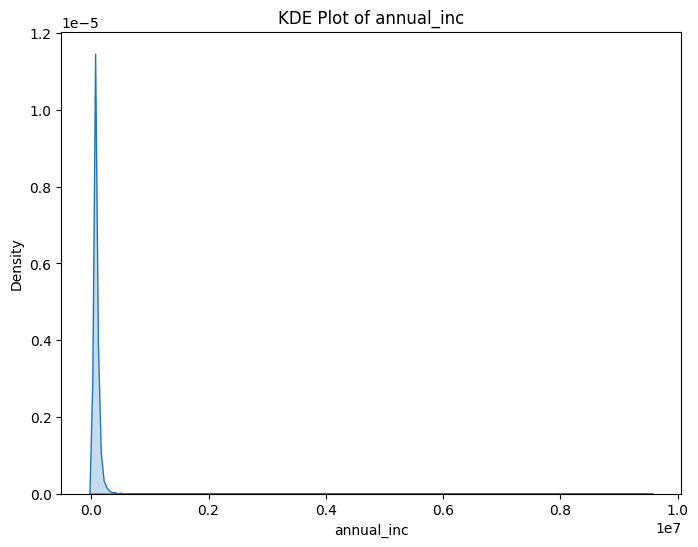

In [69]:
plot_kde(fintech_df_2, 'annual_inc')

data is not normal distributed so we will use boxplot

##### Boxplot

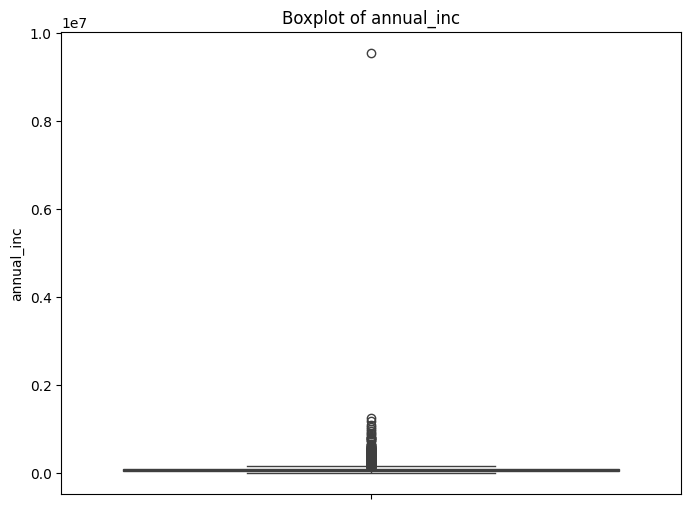

In [71]:
plot_boxplot(fintech_df_2, 'annual_inc')

In [76]:
annual_inc_boxplot_mask, annual_inc_lower_whisker, annual_inc_upper_whisker = calculate_whiskers(fintech_df_2, 'annual_inc')

In [77]:
annual_inc_lower_whisker, annual_inc_upper_whisker

(-22500.0, 165500.0)

In [81]:
annual_inc_outliers = len(annual_inc_boxplot_mask[annual_inc_boxplot_mask==True])

In [85]:
print(f'Percentage of Outliers: {annual_inc_outliers/len(fintech_df_2)*100:.3f}%')
print(f'Number of outliers: {annual_inc_outliers}')

Percentage of Outliers: 4.920%
Number of outliers: 1330


### verification_status

In [48]:
fintech_df_2['verification_status'].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

In [49]:
fintech_df_2['verification_status'].isna().sum()

0

need to encode

In [50]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'verification_status')

In [52]:
fintech_df_2['verification_status_Not Verified'].unique(), fintech_df_2['verification_status_Source Verified'].unique(), fintech_df_2['verification_status_Verified'].unique() 

(array([0, 1]), array([1, 0]), array([0, 1]))

In [51]:
global_lookup_table

,Column,Original,Encoded
0,home_ownership,MORTGAGE,home_ownership_MORTGAGE
1,home_ownership,OWN,home_ownership_OWN
2,home_ownership,RENT,home_ownership_RENT
3,home_ownership,ANY,home_ownership_ANY
4,verification_status,Source Verified,verification_status_Source Verified
5,verification_status,Verified,verification_status_Verified
6,verification_status,Not Verified,verification_status_Not Verified


### zip_code

In [59]:
fintech_df_2['zip_code'].unique()

array(['333xx', '237xx', '111xx', '070xx', '750xx', '762xx', '452xx',
       '125xx', '082xx', '105xx', '342xx', '786xx', '337xx', '372xx',
       '357xx', '925xx', '989xx', '331xx', '770xx', '852xx', '113xx',
       '284xx', '926xx', '741xx', '064xx', '327xx', '027xx', '761xx',
       '744xx', '484xx', '623xx', '480xx', '841xx', '216xx', '038xx',
       '600xx', '085xx', '294xx', '117xx', '120xx', '973xx', '060xx',
       '182xx', '145xx', '322xx', '278xx', '928xx', '844xx', '151xx',
       '787xx', '605xx', '797xx', '908xx', '606xx', '303xx', '920xx',
       '907xx', '930xx', '546xx', '302xx', '161xx', '550xx', '330xx',
       '363xx', '633xx', '321xx', '351xx', '464xx', '148xx', '021xx',
       '207xx', '104xx', '939xx', '201xx', '785xx', '286xx', '473xx',
       '271xx', '209xx', '384xx', '753xx', '951xx', '087xx', '756xx',
       '956xx', '483xx', '490xx', '225xx', '292xx', '672xx', '958xx',
       '301xx', '193xx', '276xx', '890xx', '328xx', '300xx', '846xx',
       '325xx', '662

In [60]:
fintech_df_2['zip_code'].isna().sum()

0

### addr_state

In [29]:
(fintech_df_2['state'] == fintech_df_2['addr_state']).all()

True

In [61]:
fintech_df_2['addr_state'].isna().sum()

0

need to encode

In [53]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'addr_state')

In [54]:
global_lookup_table

,Column,Original,Encoded
0,home_ownership,MORTGAGE,home_ownership_MORTGAGE
1,home_ownership,OWN,home_ownership_OWN
2,home_ownership,RENT,home_ownership_RENT
3,home_ownership,ANY,home_ownership_ANY
4,verification_status,Source Verified,verification_status_Source Verified
5,verification_status,Verified,verification_status_Verified
6,verification_status,Not Verified,verification_status_Not Verified
7,addr_state,FL,addr_state_FL
8,addr_state,VA,addr_state_VA
9,addr_state,NY,addr_state_NY


### avg_cur_bal

In [56]:
fintech_df_2['avg_cur_bal'].unique()

array([ 8275., 25385.,   282., ..., 24701.,  8393., 13313.])

In [57]:
fintech_df_2['avg_cur_bal'].isna().sum()

0

### tot_cur_bal

In [58]:
fintech_df_2['tot_cur_bal'].unique()

array([239986., 279232.,   1691., ...,  58754.,  22390., 133129.])

In [59]:
fintech_df_2['tot_cur_bal'].isna().sum()

0

### loan_id

In [60]:
fintech_df_2['loan_id'].unique()

array([ 39474, 158200, 113752, ..., 132651,  15314,   5616], dtype=int64)

In [61]:
fintech_df_2['loan_id'].isna().sum()

0

### loan_status

In [62]:
fintech_df_2['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default'], dtype=object)

In [63]:
fintech_df_2['loan_status'].isna().sum()

0

need to encode

In [64]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'loan_status')

In [65]:
global_lookup_table

,Column,Original,Encoded
0,home_ownership,MORTGAGE,home_ownership_MORTGAGE
1,home_ownership,OWN,home_ownership_OWN
2,home_ownership,RENT,home_ownership_RENT
3,home_ownership,ANY,home_ownership_ANY
4,verification_status,Source Verified,verification_status_Source Verified
...,...,...,...
59,loan_status,Charged Off,loan_status_Charged Off
60,loan_status,In Grace Period,loan_status_In Grace Period
61,loan_status,Late (31-120 days),loan_status_Late (31-120 days)
62,loan_status,Late (16-30 days),loan_status_Late (16-30 days)


### loan_amount

In [66]:
fintech_df_2['loan_amount'].unique()

array([ 6000., 15000., 11500., ..., 39600., 29475.,  1675.])

In [67]:
fintech_df_2['loan_amount'].isna().sum()

0

### state

In [68]:
fintech_df_2['state'].unique()

array(['FL', 'VA', 'NY', 'NJ', 'TX', 'OH', 'TN', 'AL', 'CA', 'WA', 'AZ',
       'NC', 'OK', 'CT', 'MA', 'MI', 'IL', 'UT', 'MD', 'NH', 'SC', 'OR',
       'PA', 'GA', 'WI', 'MN', 'MO', 'IN', 'KS', 'NV', 'CO', 'RI', 'AR',
       'WV', 'NE', 'DE', 'MS', 'SD', 'MT', 'VT', 'LA', 'WY', 'KY', 'DC',
       'ME', 'NM', 'HI', 'AK', 'ND', 'ID'], dtype=object)

In [69]:
fintech_df_2['state'].isna().sum()

0

need to encode

In [70]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'state')

In [71]:
global_lookup_table

,Column,Original,Encoded
0,home_ownership,MORTGAGE,home_ownership_MORTGAGE
1,home_ownership,OWN,home_ownership_OWN
2,home_ownership,RENT,home_ownership_RENT
3,home_ownership,ANY,home_ownership_ANY
4,verification_status,Source Verified,verification_status_Source Verified
...,...,...,...
109,state,NM,state_NM
110,state,HI,state_HI
111,state,AK,state_AK
112,state,ND,state_ND


### funded_amount

In [72]:
fintech_df_2['funded_amount'].unique()

array([ 6000., 15000., 11500., ..., 39600., 29475.,  1675.])

In [73]:
fintech_df_2['funded_amount'].isna().sum()

0

### term

In [74]:
fintech_df_2['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [75]:
fintech_df_2['term'].isna().sum()

0

In [76]:
def clean_term_col(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[col_name] = df[col_name].str.replace('months', '').str.strip()
    df[col_name] = df[col_name].astype(int)
    return df

In [77]:
fintech_df_2 = clean_term_col(fintech_df_2, 'term')

In [78]:
fintech_df_2['term'].unique()

array([36, 60])

need to encode

In [79]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'term')

In [80]:
global_lookup_table

,Column,Original,Encoded
0,home_ownership,MORTGAGE,home_ownership_MORTGAGE
1,home_ownership,OWN,home_ownership_OWN
2,home_ownership,RENT,home_ownership_RENT
3,home_ownership,ANY,home_ownership_ANY
4,verification_status,Source Verified,verification_status_Source Verified
...,...,...,...
111,state,AK,state_AK
112,state,ND,state_ND
113,state,ID,state_ID
114,term,36,term_36


### int_rate

In [81]:
fintech_df_2['int_rate'].unique()

array([0.0649, 0.1806, 0.1114, 0.2149, 0.1171, 0.1899, 0.0967, 0.1499,
       0.0692, 0.0799, 0.288 , 0.1288, 0.1299, 0.1747, 0.1042, 0.0624,
       0.1335, 0.1367, 0.0867, 0.1333, 0.234 , 0.1561, 0.0721, 0.1199,
       0.1356, 0.1757, 0.0532, 0.0707, 0.0944, 0.0619, 0.0759, 0.1399,
       0.1505, 0.1153, 0.1407, 0.1091, 0.1557, 0.1524, 0.0916, 0.0791,
       0.0646, 0.1408, 0.1398, 0.0917, 0.1072, 0.1262, 0.1774,    nan,
       0.1905, 0.1709, 0.143 , 0.124 , 0.164 , 0.1894, 0.1691, 0.1259,
       0.0846, 0.1149, 0.1629, 0.0839, 0.1274, 0.1099, 0.1797, 0.0824,
       0.0881, 0.0789, 0.0689, 0.2779, 0.0818, 0.118 , 0.1273, 0.1504,
       0.1854, 0.0699, 0.0746, 0.089 , 0.0999, 0.1588, 0.1599, 0.0819,
       0.0899, 0.0531, 0.2055, 0.0702, 0.1144, 0.1239, 0.2399, 0.1646,
       0.1903, 0.1999, 0.1269, 0.1952, 0.0667, 0.2534, 0.0762, 0.1308,
       0.0611, 0.2145, 0.0943, 0.1008, 0.1359, 0.227 , 0.2383, 0.1559,
       0.0993, 0.1016, 0.0726, 0.1047, 0.1845, 0.0756, 0.1825, 0.0797,
      

In [82]:
fintech_df_2['int_rate'].isna().sum()

1185

need to impute

### grade

In [83]:
fintech_df_2['grade'].unique()

array([ 4, 20,  7, 23, 10, 19,  8, 14,  5, 11, 18,  6,  1, 12, 15, 25, 13,
        2,  9,  3, 28, 17, 27, 24, 30, 16, 26, 21, 29, 35, 22, 33, 34, 31,
       32], dtype=int64)

In [84]:
fintech_df_2['grade'].isna().sum()

0

### issue_date

In [85]:
fintech_df_2['issue_date'].unique()

array(['14 August 2014', '17 July 2017', '12 December 2012',
       '12 November 2012', '19 September 2019', '17 January 2017',
       '13 November 2013', '16 December 2016', '15 March 2015',
       '17 March 2017', '19 April 2019', '15 December 2015',
       '15 January 2015', '18 June 2018', '15 November 2015',
       '14 November 2014', '16 February 2016', '15 February 2015',
       '14 February 2014', '18 October 2018', '17 September 2017',
       '18 August 2018', '16 March 2016', '16 May 2016', '17 June 2017',
       '15 October 2015', '16 August 2016', '15 September 2015',
       '17 May 2017', '18 April 2018', '17 August 2017',
       '17 December 2017', '18 December 2018', '14 October 2014',
       '15 June 2015', '19 January 2019', '18 February 2018',
       '19 July 2019', '16 June 2016', '13 June 2013', '17 November 2017',
       '19 June 2019', '19 October 2019', '19 March 2019',
       '18 November 2018', '13 May 2013', '15 July 2015',
       '18 September 2018', '17 Apri

In [86]:
fintech_df_2['issue_date'].isna().sum()

0

In [87]:
def clean_issue_date(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[col_name] = pd.to_datetime(df[col_name])
    return df

In [88]:
fintech_df_2 = clean_issue_date(fintech_df_2, 'issue_date')

In [89]:
fintech_df_2['issue_date'].unique()

<DatetimeArray>
['2014-08-14 00:00:00', '2017-07-17 00:00:00', '2012-12-12 00:00:00',
 '2012-11-12 00:00:00', '2019-09-19 00:00:00', '2017-01-17 00:00:00',
 '2013-11-13 00:00:00', '2016-12-16 00:00:00', '2015-03-15 00:00:00',
 '2017-03-17 00:00:00', '2019-04-19 00:00:00', '2015-12-15 00:00:00',
 '2015-01-15 00:00:00', '2018-06-18 00:00:00', '2015-11-15 00:00:00',
 '2014-11-14 00:00:00', '2016-02-16 00:00:00', '2015-02-15 00:00:00',
 '2014-02-14 00:00:00', '2018-10-18 00:00:00', '2017-09-17 00:00:00',
 '2018-08-18 00:00:00', '2016-03-16 00:00:00', '2016-05-16 00:00:00',
 '2017-06-17 00:00:00', '2015-10-15 00:00:00', '2016-08-16 00:00:00',
 '2015-09-15 00:00:00', '2017-05-17 00:00:00', '2018-04-18 00:00:00',
 '2017-08-17 00:00:00', '2017-12-17 00:00:00', '2018-12-18 00:00:00',
 '2014-10-14 00:00:00', '2015-06-15 00:00:00', '2019-01-19 00:00:00',
 '2018-02-18 00:00:00', '2019-07-19 00:00:00', '2016-06-16 00:00:00',
 '2013-06-13 00:00:00', '2017-11-17 00:00:00', '2019-06-19 00:00:00',
 '20

### pymnt_plan

In [90]:
fintech_df_2['pymnt_plan'].unique()

array([False,  True])

In [91]:
fintech_df_2['pymnt_plan'].isna().sum()

0

In [92]:
def clean_pymnt_plan(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    df[col_name] = df[col_name].astype(int)
    return df

In [93]:
fintech_df_2 = clean_pymnt_plan(fintech_df_2, 'pymnt_plan')

In [94]:
fintech_df_2['pymnt_plan'].unique()

array([0, 1])

### type

In [95]:
fintech_df_2['type'].unique()

array(['INDIVIDUAL', 'Individual', 'Joint App', 'JOINT', 'DIRECT_PAY'],
      dtype=object)

In [96]:
fintech_df_2['type'].isna().sum()

0

In [97]:
def standardize_loan_type(df: pd.DataFrame, type_col: str) -> pd.DataFrame:
    type_mapping = {
        'INDIVIDUAL': 'Individual',
        'JOINT': 'Joint',
        'Joint App': 'Joint',
        'DIRECT_PAY': 'Direct Pay'
    }

    df[type_col] = df[type_col].replace(type_mapping)
    
    return df

In [98]:
fintech_df_2 = standardize_loan_type(fintech_df_2, 'type')

In [99]:
fintech_df_2['type'].unique()

array(['Individual', 'Joint', 'Direct Pay'], dtype=object)

need to encode

In [100]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'type')

In [101]:
global_lookup_table

,Column,Original,Encoded
0,home_ownership,MORTGAGE,home_ownership_MORTGAGE
1,home_ownership,OWN,home_ownership_OWN
2,home_ownership,RENT,home_ownership_RENT
3,home_ownership,ANY,home_ownership_ANY
4,verification_status,Source Verified,verification_status_Source Verified
...,...,...,...
114,term,36,term_36
115,term,60,term_60
116,type,Individual,type_Individual
117,type,Joint,type_Joint


### purpose

In [102]:
fintech_df_2['purpose'].unique()

array(['debt_consolidation', 'other', 'credit_card', 'home_improvement',
       'major_purchase', 'small_business', 'medical', 'vacation', 'car',
       'moving', 'house', 'wedding', 'renewable_energy'], dtype=object)

In [103]:
fintech_df_2['purpose'].isna().sum()

0

need to encode

In [104]:
fintech_df_2 = encode_col(fintech_df_2, 'onehot', 'purpose')

In [105]:
global_lookup_table

,Column,Original,Encoded
0,home_ownership,MORTGAGE,home_ownership_MORTGAGE
1,home_ownership,OWN,home_ownership_OWN
2,home_ownership,RENT,home_ownership_RENT
3,home_ownership,ANY,home_ownership_ANY
4,verification_status,Source Verified,verification_status_Source Verified
...,...,...,...
127,purpose,car,purpose_car
128,purpose,moving,purpose_moving
129,purpose,house,purpose_house
130,purpose,wedding,purpose_wedding


### description

In [106]:
fintech_df_2['description'].unique()

array(['Debt consolidation', 'Family Help', 'Credit Card Payoff',
       'Home improvement', 'A BIRD IN THE HAND',
       'Credit card refinancing', 'Major purchase', 'Other', 'Business',
       'Debt consolidation 2013', 'Medical expenses', 'Vacation',
       'Car financing', nan, 'Help Me Get Out of  Credit Card Hell ',
       'Stress Free', 'Credit Card Freedom',
       'debt and past due credit payback', 'Consolidation',
       'Debt Consolidation', 'Freedom',
       'Credit card payment consolidation',
       'Debt Consolidation for Medical Bills', 'debt consolidation',
       'My Loan', 'Debt Free!', 'debt consolidator', 'Bus Start Up',
       'Moving and relocation', 'credit card payoff', 'Determined',
       'Loan', 'consolidation', 'refinance', 'Needed roof repair',
       'Home buying', 'fixture loan', 'My Consolidation', 'Patio',
       'Credit Card Payoff Loan', 'Suntrust Refinance',
       "Movin' to the Burbs", 'Wedding Funding',
       'Fast-track to debt free', 'CC Cons

In [107]:
fintech_df_2['description'].isna().sum()

220

need to impute

In [108]:
fintech_df_2[fintech_df_2['description'].isna()]

,emp_title,emp_length,annual_inc,annual_inc_joint,zip_code,avg_cur_bal,tot_cur_bal,loan_id,loan_amount,funded_amount,int_rate,grade,issue_date,pymnt_plan,description,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,loan_status_Charged Off,loan_status_Current,loan_status_Default,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_ME,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,term_36,term_60,type_Direct Pay,type_Individual,type_Joint,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
YidceDlmXHg5ZFx4YzFceDhlXHgxNXYpXHhjNCE6ISRceDg0XHg5N3dceGZkVlx4OTVBXHhmYVx4MDhNXHg5NypEXHhjY1x4MGM0XHhmNVx4MDZceGMxXHhhYyc=,supervisor,11.0,140000.0,NaN,958xx,6557.0,85236.0,214543,24000.0,24000.0,0.0532,5,2016-05-16,0,NaN,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
YidxXHhkZFx4ZThZa1x4MGYyUlx4Y2RceGQ0LVx4ZjYsYFJceDg3XHhkZFx4YjlrVXJceDg3KVx4YWRceGZiPlx4YzNrMCkjXHhhMSc=,conductor,5.0,63000.0,NaN,112xx,2537.0,12683.0,54443,7000.0,7000.0,NaN,12,2016-08-16,0,NaN,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
YidceDhhXHhhNm5UPFx4ZTdceGRlXHhiYVx4MWJceGJhXHgwMlx4OGZlXHhmYlx4ZjhceGNmXHg5OVx4YjBpXHgxNkZceDEyXHhlMVx4YzdceGUxXHhhMkA7XHgwMXJceGRiXHhmMSc=,customer service,11.0,42000.0,NaN,461xx,16350.0,163501.0,125202,12000.0,12000.0,0.1199,11,2016-04-16,0,NaN,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
YidceDEwXHhkNlx4YzRceDgyXHhmMVx4MTV8RHdcclx4ZGNaXHhiYlx4ZDkiXHhmNlx4ZmZceDE4XHhmYT14XHg4NFx4YWVceGI1M1wnXHgxZFx4YzBceGNmJFx4ODFceDkxJw==,account payable specialist,11.0,56000.0,NaN,119xx,3265.0,39182.0,88022,10000.0,10000.0,0.0916,6,2016-06-16,0,NaN,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [109]:
def impute_description(df: pd.DataFrame, desc_col: str) -> pd.DataFrame:
    df[desc_col] = df[desc_col].fillna('No Description')
    return df

In [110]:
fintech_df_2 = impute_description(fintech_df_2, 'description')

In [111]:
fintech_df_2['description'].unique()

array(['Debt consolidation', 'Family Help', 'Credit Card Payoff',
       'Home improvement', 'A BIRD IN THE HAND',
       'Credit card refinancing', 'Major purchase', 'Other', 'Business',
       'Debt consolidation 2013', 'Medical expenses', 'Vacation',
       'Car financing', 'No Description',
       'Help Me Get Out of  Credit Card Hell ', 'Stress Free',
       'Credit Card Freedom', 'debt and past due credit payback',
       'Consolidation', 'Debt Consolidation', 'Freedom',
       'Credit card payment consolidation',
       'Debt Consolidation for Medical Bills', 'debt consolidation',
       'My Loan', 'Debt Free!', 'debt consolidator', 'Bus Start Up',
       'Moving and relocation', 'credit card payoff', 'Determined',
       'Loan', 'consolidation', 'refinance', 'Needed roof repair',
       'Home buying', 'fixture loan', 'My Consolidation', 'Patio',
       'Credit Card Payoff Loan', 'Suntrust Refinance',
       "Movin' to the Burbs", 'Wedding Funding',
       'Fast-track to debt fr

In [112]:
fintech_df_2['description'].isna().sum()

0

# Data Transformation and Feature Engineering

## Add 4 Columns

### Add Month Number

In [113]:
def add_month_col(df: pd.DataFrame, date_col_name: str,  month_col_name: str) -> pd.DataFrame:
    df[month_col_name] = df[date_col_name].dt.month
    return df

In [114]:
fintech_df_2 = add_month_col(fintech_df_2, 'issue_date', 'issue_month')

### Can Salary Cover

In [115]:
fintech_df_2[['annual_inc', 'annual_inc_joint', 'loan_amount']]

,annual_inc,annual_inc_joint,loan_amount
customer_id,,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,80000.0,NaN,6000.0
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,75384.0,NaN,15000.0
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,33800.0,NaN,11500.0
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,50000.0,NaN,18000.0
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,75000.0,160000.0,25000.0
...,...,...,...
YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YTNceGEwXHgwN1x4ZjhceGJlXHhiZWtceGQyXHhmZlpceGM1XHhmYlx4YjAhXHhjZFx4ZTVceGVkXHhjNV1ceGRkXHhlZVx4ZGJceDFhXHhhMSc=,85000.0,NaN,35000.0
YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XHhjNjRceGJkXHhiY1JceGZmVFx4Y2Q6ZFx4OTZceGVmTlx4ZjZceGQxXHg4YVx4Y2RceGY5RDVgXHgxZic=,50000.0,NaN,10000.0
Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceDFkK1x4YTRceGE1XHg5ZlxybVx4MTRzRVx4ZjZceGQwXHgwMFx4ZmVrXHhjOVx4MDVceGUwXHgxZlx4Yjcn,60000.0,NaN,13000.0


In [122]:
global_lookup_table[global_lookup_table['Column']=='type']['Encoded'].values

array(['type_Individual', 'type_Joint', 'type_Direct Pay'], dtype=object)

In [129]:
def can_salary_cover(df: pd.DataFrame, 
                     annual_income_col: str, 
                     loan_amount_col: str, 
                     annual_joint_col: str, 
                     loan_type_col: str) -> pd.DataFrame:
    
    # Define a helper function to determine if salary can cover the loan
    def salary_cover(row):
        # use global_lookup_table to get the encoded value of the loan type
        for i, encoded_col in enumerate(encoded_loan_type_cols):
            if row[encoded_col] == 1:
                loan_type = orignal_loan_type_cols[i]
                break

        loan_amount = row[loan_amount_col]
        
        # If loan type is "Joint", compare with joint income
        if loan_type == "Joint":
            return row[annual_joint_col] >= loan_amount
        # If loan type is "Individual" or "Direct Pay", compare with individual income
        elif loan_type == "Individual" or loan_type == "Direct Pay":
            return row[annual_income_col] >= loan_amount
        # Return False for any other case (or if it's not specified)
        else:
            return False

    # Apply the function to each row in the DataFrame and create a new column
    encoded_loan_type_cols = global_lookup_table[global_lookup_table['Column'] == loan_type_col]['Encoded'].values
    orignal_loan_type_cols = global_lookup_table[global_lookup_table['Column'] == loan_type_col]['Original'].values
    df['salary_can_cover'] = df.apply(salary_cover, axis=1)
    
    return df

In [131]:
fintech_df_2 = can_salary_cover(
    df=fintech_df_2, 
    annual_income_col='annual_inc', 
    loan_amount_col='loan_amount', 
    annual_joint_col='annual_inc_joint', 
    loan_type_col='type')

In [132]:
fintech_df_2[['annual_inc', 'annual_inc_joint', 'loan_amount', 'salary_can_cover']][fintech_df_2['salary_can_cover']==False]

,annual_inc,annual_inc_joint,loan_amount,salary_can_cover
customer_id,,,,
Yic/XHgwZlx4ZGNceDg5XHhhMFdbbFx4YjlceDdmXHgwZlx4ZWNceGFmXHgwN1x4ZWVceGY1VVx4YmZceDFiXHhkMVx4ZTNceDEyfXFceDExXHhhOWElXHhhY2lceDk4XHhhNic=,19965.0,NaN,23850.0,False
YidyM3lceGRjV3hceGUxXHhmMFx4OTlceGQ1XHg4M1x4OTg1XHgwMlx4ZWVcXFx4OWZceDllXHhkMFx4ODVcdFx4Y2RceGZjXHhlMVx4MTFlXHhiY1x4YTBceGQ3clx4ZjVccic=,35000.0,NaN,39225.0,False
YidceGU3KVx4ODRceGQyezdceDE4XHhlNlx4OWNzO1x4YmJceGU0XHhkYVx4OTVceDA0Ilx4ZjlceDk2XHg5N0BmXHhlMVx4ZTNcJ1x4ZDlceGE3XHg4YVx4YTRceDhmXHhjYlx4OWQn,19888.0,NaN,20000.0,False


### Letter Grade

In [43]:
def change_number_to_grade(df: pd.DataFrame, col_name: str) -> pd.DataFrame:
    grade_mapping = {
        'A': range(1,6),
        'B': range(6,11),
        'C': range(11,16),
        'D': range(16,21),
        'E': range(21,26),
        'F': range(26,31),
        'G': range(31,36)
    }
    def get_grade(x: int):
        for k, v in grade_mapping.items():
            if x in v:
                return k

    df['letter_grade'] = df[col_name].apply(lambda x: get_grade(x))
    
    return df

In [44]:
fintech_df_2 = change_number_to_grade(fintech_df_2, 'grade')

In [45]:
fintech_df_2[['grade', 'letter_grade']]

,grade,letter_grade
customer_id,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,4,A
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,20,D
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,7,B
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,23,E
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,10,B
...,...,...
YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YTNceGEwXHgwN1x4ZjhceGJlXHhiZWtceGQyXHhmZlpceGM1XHhmYlx4YjAhXHhjZFx4ZTVceGVkXHhjNV1ceGRkXHhlZVx4ZGJceDFhXHhhMSc=,17,D
YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XHhjNjRceGJkXHhiY1JceGZmVFx4Y2Q6ZFx4OTZceGVmTlx4ZjZceGQxXHg4YVx4Y2RceGY5RDVgXHgxZic=,6,B
Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceDFkK1x4YTRceGE1XHg5ZlxybVx4MTRzRVx4ZjZceGQwXHgwMFx4ZmVrXHhjOVx4MDVceGUwXHgxZlx4Yjcn,1,A


### Installment per month

In [46]:
fintech_df_2['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [47]:
def calculate_installment_per_month(df: pd.DataFrame, loan_amount_col: str, term_col: str, int_rate_col: str) -> pd.DataFrame:
    df['term_months'] = df[term_col].str.extract('(\d+)').astype(int)
    r = df[int_rate_col]/12
    n = df['term_months']
    P = df[loan_amount_col]
    numerator = r * (1+r)**n
    denominator = (1+r)**n - 1
    df['installment_per_month'] = P * (numerator/denominator)
    df = df.drop(columns=['term_months'])
    return df

In [48]:
fintech_df_2 = calculate_installment_per_month(fintech_df_2, 'loan_amount', 'term', 'int_rate')

## Categorical Encoding

In [49]:
fintech_df_2.columns

Index(['emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'annual_inc_joint', 'verification_status', 'zip_code', 'addr_state',
       'avg_cur_bal', 'tot_cur_bal', 'loan_id', 'loan_status', 'loan_amount',
       'state', 'funded_amount', 'term', 'int_rate', 'grade', 'issue_date',
       'pymnt_plan', 'type', 'purpose', 'description', 'issue_month',
       'salary_can_cover', 'letter_grade', 'installment_per_month'],
      dtype='object')

In [56]:
fintech_df_2['purpose'].nunique()

13

In [51]:
categorical_features = ['letter_grade', 'state', 'type', 'term', 'loan_status', 'verification_status', 'home_ownership']
# maybe purpose, issue_month
# pymnt_plan and salary_can_cover are True/False
for col in categorical_features:
    print(f'{col} unique values: {fintech_df_2[col].unique()}')


letter_grade unique values: ['A' 'D' 'B' 'E' 'C' 'F' 'G']

state unique values: ['FL' 'VA' 'NY' 'NJ' 'TX' 'OH' 'TN' 'AL' 'CA' 'WA' 'AZ' 'NC' 'OK' 'CT'
 'MA' 'MI' 'IL' 'UT' 'MD' 'NH' 'SC' 'OR' 'PA' 'GA' 'WI' 'MN' 'MO' 'IN'
 'KS' 'NV' 'CO' 'RI' 'AR' 'WV' 'NE' 'DE' 'MS' 'SD' 'MT' 'VT' 'LA' 'WY'
 'KY' 'DC' 'ME' 'NM' 'HI' 'AK' 'ND' 'ID']

type unique values: ['Individual' 'Joint' 'Direct Pay']

term unique values: [' 36 months' ' 60 months']

loan_status unique values: ['Current' 'Fully Paid' 'Charged Off' 'In Grace Period'
 'Late (31-120 days)' 'Late (16-30 days)' 'Default']

verification_status unique values: ['Source Verified' 'Verified' 'Not Verified']

home_ownership unique values: ['MORTGAGE' 'OWN' 'RENT' 'ANY']



## Normalization

# Bonus Task

In [52]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

def get_state_names(url: str):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    rows = soup.find_all('tr')[1:] 
    state_dict = {}
    for row in rows:
        cols = row.find_all('td')
        if len(cols) >= 3:
            state_name = cols[0].text.strip()
            state_abbreviation = cols[2].text.strip()
            state_dict[state_abbreviation] = state_name
    return state_dict

def add_state_names(df: pd.DataFrame, state_col: str, url: str) -> pd.DataFrame:
    state_dict = get_state_names(url)
    df['state_name'] = df[state_col].map(state_dict)
    return df

url = "https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971"

fintech_df_2 = add_state_names(fintech_df_2, 'state', url)



In [53]:
fintech_df_2[['state', 'state_name']]

,state,state_name
customer_id,,
YidceDkzalx4YmRceGM2XHg4MiZceDE3c0BceDhiS0JceGFjVVx4ZjVceDhhbjBceGQ0S1x4Y2RRXHgwOFx4OGVAXHhiNVx4ZGJceDg3K2pceDgyVic=,FL,Florida
Yic0SVx4ZjRceGZlXHhhMSpceGQ4emFceDBmTVx4MWRceDAzXHhmZFhceGJmeVx4MTQ7XHg4Nlx4ZmVceGU4XHhiMVx4ODFceGNiXHhjY1x4ZWE7XHhlMlx4ZWNceGNlXHhjMCc=,VA,Virginia
YidceGUyXHgxZVx4MTVceGJkXHhlY1x4ZDNceDhhXHhhZT9ceGQ3XHg5M1x4ODEqXHg5OFx4MWVceDBjXHhlNXdjXHgwMFx4ZjFceDFmSlx4ZDdDc1x4OGVceDk0XHhjN1x4ZjV+NCc=,NY,New York
YidcXD1ceDg2XHhhZlx4ZGJWXHgwNGRceDg5XHhkZlx4ZTIvdk5ceDk5Qlx4ZTBceGZhV0tSXHhlZWtceGE2I1x4ZjlfXHhhMlx4ODElKHEn,NJ,New Jersey
YidceDgyXHgwNiZceGU4XHgwM1x4YWRceGY1XHg4NFx4YWNceGIwUjdeXHhhZFx4ODZceGFjXS5ceDhlXHhiMFx4ODlceDFkPVx4YTZBXHhkNFVGIVxuXHhjMlx4MGYn,TX,Texas
...,...,...
YidceDljXHhhOVVceGM2XHhjZlx4OWNceDAyXHhlNFx4YTNceGEwXHgwN1x4ZjhceGJlXHhiZWtceGQyXHhmZlpceGM1XHhmYlx4YjAhXHhjZFx4ZTVceGVkXHhjNV1ceGRkXHhlZVx4ZGJceDFhXHhhMSc=,NJ,New Jersey
YidPXHgwM1x4OWRceGIyYXZceGM3XHg4MFx4ZDRceGY3XHhjNjRceGJkXHhiY1JceGZmVFx4Y2Q6ZFx4OTZceGVmTlx4ZjZceGQxXHg4YVx4Y2RceGY5RDVgXHgxZic=,CT,Connecticut
Yic6XHg5OVlzXHg4Mlx4YjdZXHhjMmpceGE4Klx4ZDNceDFkK1x4YTRceGE1XHg5ZlxybVx4MTRzRVx4ZjZceGQwXHgwMFx4ZmVrXHhjOVx4MDVceGUwXHgxZlx4Yjcn,WI,Wisconsin


# Save the cleaned dataset

In [ ]:
fintech_df_2.to_csv('fintech_data_MET_2_52_1008_clean.csv')